# Notebook Imports and Packages

In [125]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # inbuil function for mse

%matplotlib inline

# Example 1 - A simple cost function
### $$f(x) = x^2 + x + 1$$

In [126]:
def f(x):
    return x**2 + x + 1

In [127]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)   # gives 500 numbers between -3 to 3
#x_1

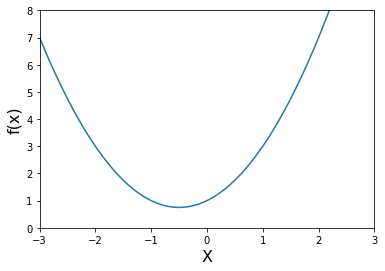

In [128]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives
Create a python function for the derivative of f(x) called df(x)

In [129]:
def df(x):
    return 2*x + 1

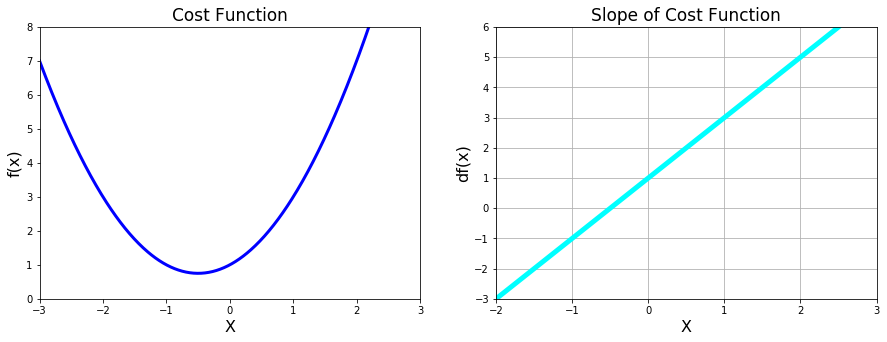

In [130]:
# Plot fuctionality and derivative side by side

plt.figure(figsize=[15,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim([-2,3])
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='cyan', linewidth=5)

plt.show()

## Python Loops and Gradient Descent

In [131]:
# Python For Loop
for i in range(5):
    print('Hello!', i)
print('End of Loop')

Hello! 0
Hello! 1
Hello! 2
Hello! 3
Hello! 4
End of Loop


In [132]:
# Python While Loop
counter=0
while counter < 5:
    print('Counting...', counter)
    counter = counter + 1
print('While Done...')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
While Done...


In [133]:
# Gradient Decent
new_x = 3                # starting point
previous_x = 0           # temp value
step_multiplier = 0.1    # learning rate
precision = 0.00001       # how precise answer should be

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many time:', n)
        break
    
print('Local Minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many time: 50
Local Minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


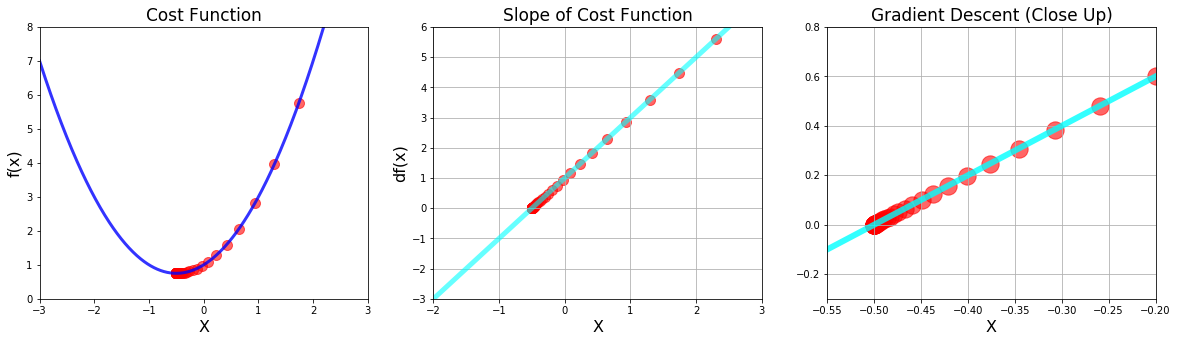

In [134]:
# Superimpose Gradient Descent Calculations on plot

plt.figure(figsize=[20,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 3, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim([-2,3])
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='cyan', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

# 2 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (Close Up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()

plt.xlim([-0.55, -0.2])
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color='cyan', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2- Multiple Minima vs Initial Guess & Advance Functions
## $$g(x) = x^4 - 4x^2 + 5$$

In [135]:
# Make some data
x_2 =  np.linspace(-2, 2, 1000)

# Writing the g(x) function and the function in Python 
def g(x):
    return x**4 - 4*x**2 +5

def dg(x):
    return 4*x**3 - 8*x

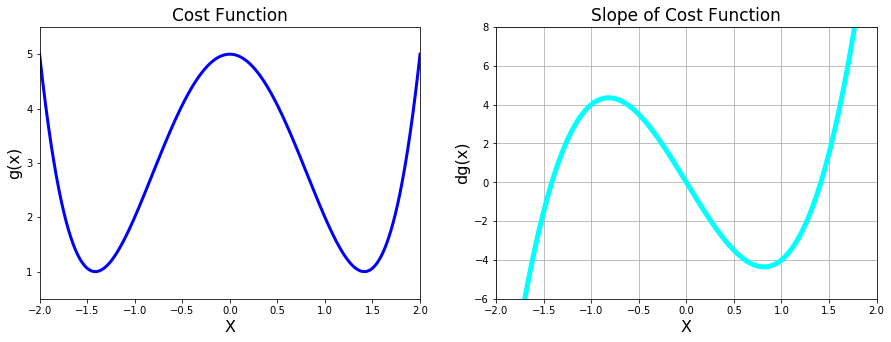

In [136]:
# Plot fuctionality and derivative side by side

plt.figure(figsize=[15,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim([-2,2])
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='cyan', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [137]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [138]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)   # > adding arguments in sequence: derivative function, starting position, learning rate, precision
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [139]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= -0.5, 
                                                multiplier= 0.01, precision= 0.0001) 
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [140]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= -0.1)      # press shift + Tab on gradient_decent() to get some information 
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


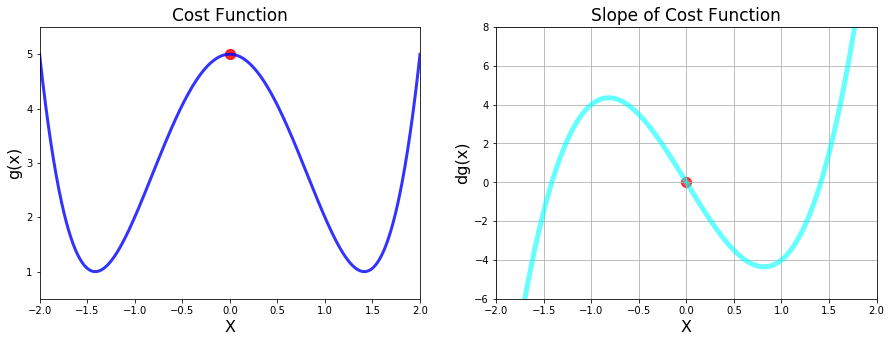

In [141]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= 0)

# Plot fuctional and derivative and scatter plot side by side

plt.figure(figsize=[15,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim([-2,2])
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='cyan', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# This algorithm is weak as we pass initial value different it gives differnt postions, it is disturbing as we start at 0.1 or -0.1 or 0 / Path of descent is influenced by initial guess
# Sensitivity of path of gradient descent to the initial guess(as both minima cost is same)
# But if another graph with two minima having one local and one global then it will depend where goes.
# Stochastic Gradient Descent is version which has randomness. This one is called Batch Gradient Descent but none of them is perfect.

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [142]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

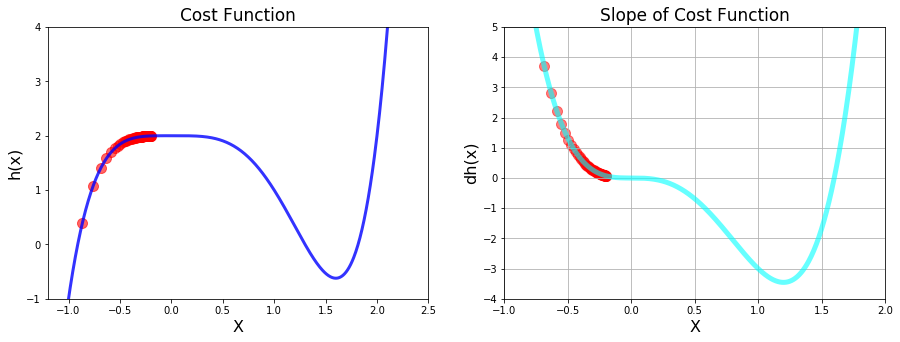

Local min occurs at: -1.8398461123332792e+24
Cost at this min is: -2.1081790694225687e+121
Number of steps including inital: 72


In [143]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh, initial_guess= -0.2, max_iter=71)

# Plot fuctional and derivative and scatter plot side by side

plt.figure(figsize=[15,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-1.2,2.5])
plt.ylim(-1,4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()

plt.xlim([-1,2])
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='cyan', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at:', local_min)
print('Cost at this min is:', h(local_min))
print('Number of steps including inital:', len(list_x))

# if we give inital_guess=-0.2 and run then it will give error that 'Result too large' // overflow error.

In [144]:
# cost at min : 380,000,000,000,000,000,000,000,000 our system can't handel these much numbers
# try to change max_iter= 'from 40,50,60,70,70,72' you'll came to know the steps increase drastically
# These errors are called exceptions.

import sys
# help(sys)
# sys.version
# type(h(local_min))

sys.float_info.max # our machine can handle this much amount of decimals

1.7976931348623157e+308

## Python Tuples

In [145]:
# Sequence of values separated by commas - Creating a tuple
breakfast = 'bread', 'jam', 'milk' # I'm veg :P
unlucky_numbers = 13, 4, 9, 26, 17

print('I love', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')   # integers are not converted to strings directly so str(=tuple=)

# Tuples and List Different because tuples includes data contains heterogenous
not_my_address = 1, 'Infinite Loop', 'Najafgarh', 211  # heterogenous
# Tuples are immutable(they can't be changed after they are made)
# breakfast[0] = 'banana' # can't be done

tuple_with_single_value = 21,   # you must put comma after to make it a tuple
type(tuple_with_single_value)

# Unpack the values inside tuples
main, side, greens = breakfast   # This is called sequence unpacking this has been done in example 2
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local Min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I love bread
My hotel has no 4th floor
Main course is bread
Local Min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# Learning Rate

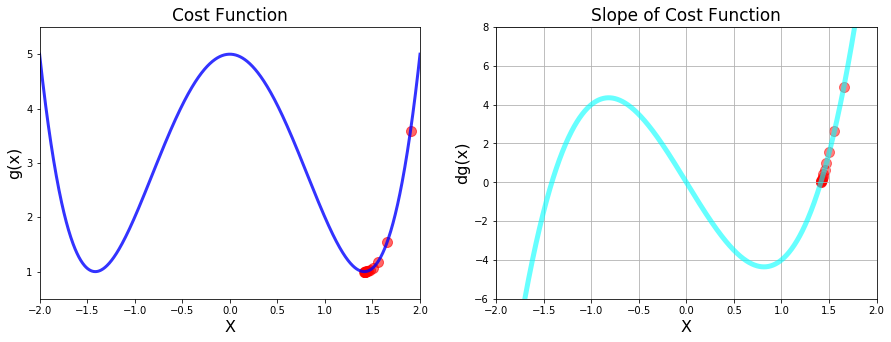

Number of steps is: 14


In [146]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= 1.9, multiplier=0.02, max_iter=500)

# Plot fuctional and derivative and scatter plot side by side

plt.figure(figsize=[15,5])  # resize the graph in inches

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)   # 1 row 2 columns & first box cost function is at 1

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim([-2,2])
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='cyan', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is:', len(list_x))

# if multipier / learning rate is high then error will come i.e. result is too large. 

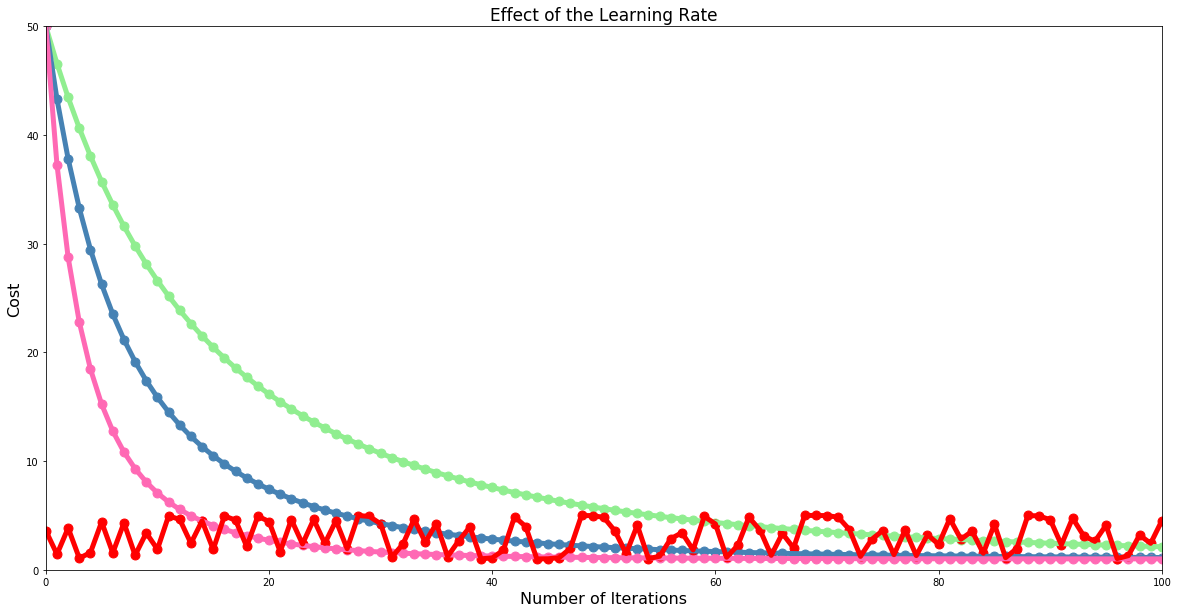

'\ninital guess and learning rate must be set up wisely.\nwe mostly adjust the learning rate while the algorith runs(it not has to be fixed can be drop and change)\nFarther you are from minima more the learnign rate but as soon as get closer it is reduced rapidly.\nAnother technique is BOLD DRIVER: If Error_Rate / Cost is reduced since last iteration then you could try increasing learning rate by 5%,\nand if error rate increased(skipped over the optimal point) then you should reset the values of the parameters to the values of previous \niterations and decrease the rate by 50%.\n'

In [147]:
# Run Gradient Descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func= dg, initial_guess= 3, multiplier=0.0005, precision = 0.0001, max_iter=n)

# Plotting 2 more learning rates: mid_gamma(0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func= dg, initial_guess= 3, multiplier=0.001, precision = 0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func= dg, initial_guess= 3, multiplier=0.002, precision = 0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func= dg, initial_guess= 1.9, multiplier=0.25, precision = 0.0001, max_iter=n)

# Plotting reduction in cost in each iteration
plt.figure(figsize=[20,10])  

plt.xlim([0,n])
plt.ylim(0,50)

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y axis data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X axis data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

#  Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

#  Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)#  Plotting low learning rate

#  Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)#  Plotting low learning rate

plt.show()

'''
inital guess and learning rate must be set up wisely.
we mostly adjust the learning rate while the algorith runs(it not has to be fixed can be drop and change)
Farther you are from minima more the learnign rate but as soon as get closer it is reduced rapidly.
Another technique is BOLD DRIVER: If Error_Rate / Cost is reduced since last iteration then you could try increasing learning rate by 5%,
and if error rate increased(skipped over the optimal point) then you should reset the values of the parameters to the values of previous 
iterations and decrease the rate by 50%.
'''

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1} $$ where $r$ is $3^{-x^2 - y^2}$

In [148]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [149]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)    # For a mathematician it is a vector

x_4, y_4 = np.meshgrid(x_4, y_4)  # return 2d array which is given 1d array
print('Array after meshgrid', x_4.shape)


Shape of X array (200,)
Array after meshgrid (200, 200)


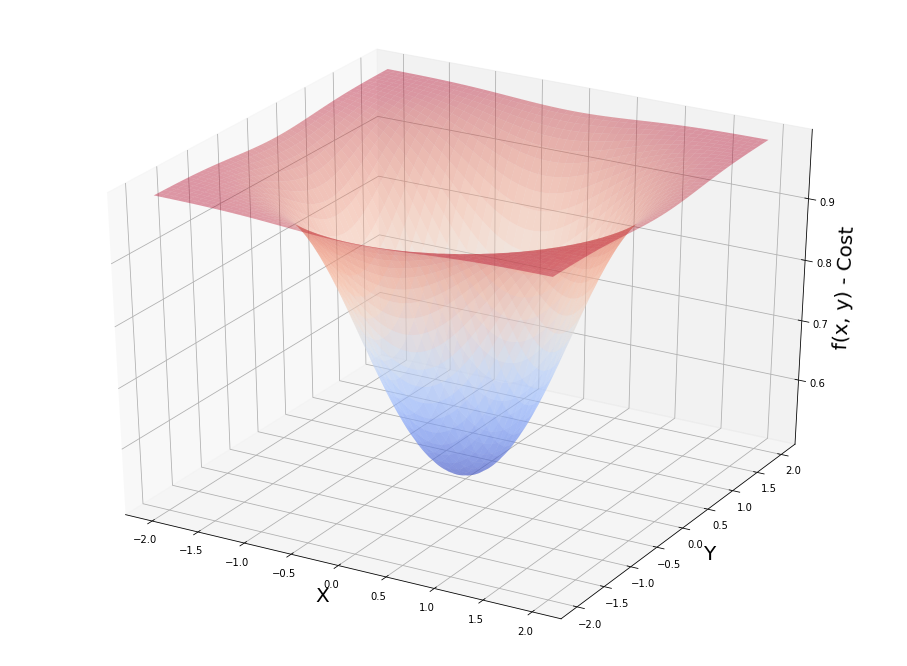

In [150]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d') # gca: get current axis

# Labelling 3D chart
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)   # it requires x,y,z but they must be 2D check docs via shift+tab on the function
# highcost is red and low cost is low

plt.show()

## Partial Derivatives & Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [151]:
a, b = symbols('x, y')   # a stands for x and b stands for y. telling python sybols
print('Out cost function f(x, y) is: ',f(a, b))
print('Partial derivative wrt x is: ',diff(f(a,b), a))    # differenciating fucntion

# calculate cost at a particular point so we have to evaluate
print('Value of f(x, y) at x=1.8 y=1.0 is:',
      f(a, b).evalf(subs={a: 1.8, b: 1.0}))  # Python Dictionary(key value pairs)[Assciative Array]

print('Value of partial derivative wrt x: ',
      diff(f(a, b), a).evalf(subs={a: 1.8, b:1.0}))

Out cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [152]:
# Setup & Calculating Cost
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess (because we've 2 values[x,y])

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    
    # Combinig the both values into single array
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # updating params
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x vlaues of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The Cost is: ', f(params[0], params[1]))
    

Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x vlaues of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The Cost is:  0.500000000000000


In [153]:
# Partial derivatives functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [154]:
# Setup & Calculating Cost
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess (because we've 2 values[x,y])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    
    # Combinig the both values into single array
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # updating params
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x vlaues of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The Cost is: ', f(params[0], params[1]))
    

Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x vlaues of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The Cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [155]:
# Setup & Calculating Cost
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess (because we've 2 values[x,y])
values_array = params.reshape(1, 2)   # making 2 dimensional array [x value in first dimenssion and y value in second dimenssion]
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    # Combinig the both values into single array
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients  # updating params
#   values_array = np.append(values_array, params.reshape(1, 2), axis=0)   # there's another way to append
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x vlaues of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The Cost is: ', f(params[0], params[1]))
    

(1, 2)
Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x vlaues of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The Cost is:  0.5


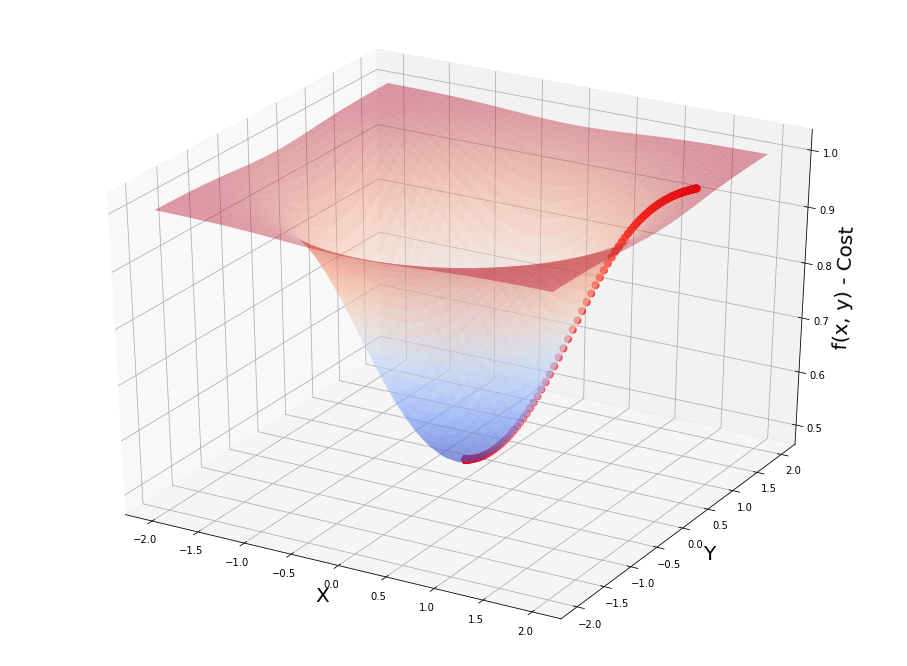

In [156]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d') # gca: get current axis

# Labelling 3D chart
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)   # it requires x,y,z but they must be 2D check docs via shift+tab on the function
# highcost is red and low cost is low
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [157]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']])   # 2D array of 1 row 2 cols
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])   # 2D array of 2 row 2 cols
print(hs_band.shape)

print('hs_band[0] : ', hs_band[0])  # gettting elements at first whole row
print('hs_band[0][1] : ', hs_band[0][1])  # getting [0][1] element 
print('hs_band[1][0] : ', hs_band[1][0]) 

the_roots = np.append(arr=hs_band, values=kirk, axis=0)   # Appending the kirk array so array is now 3x2 & axis=0 means adding by Row. [In Numpy axis=0 is row and 1 is column]
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])   # All the rows and first column (Array slicing)

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] :  ['Black Thought' 'MC']
hs_band[0][1] :  MC
hs_band[1][0] :  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with data & a Real Cost Function
## Mean Square Error: a cost function for the regression problems

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE =  \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$
$$or$$
### $$MSE =  \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$

In [158]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()  # make 1D arary to 2D array cause fit() takes 2D array
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1) # another method to make 1D to 2D array

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [159]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


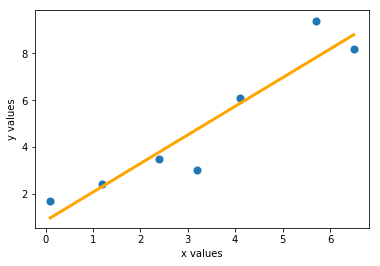

In [160]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()
# printing best fit line

In [161]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 +1.2227264637835915*x_5 
print('Estimatedd values y_hat: \n', y_hat)
print('In comparision the actual y values are: \n', y_5)
# we aproximately want same value, nearby values and these are pretty good

Estimatedd values y_hat: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [162]:
# Python function mse(y, y_hat) returs the MSE => call mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above
def mse(y, y_hat):
#     mse_calc = 1/7 * sum((y-y_hat)**2)
#     mse_calc = (1/y.size) * sum((y-y_hat)**2)  # y decides number of samples that are fed into our placeholder of y value
    mse_calc = np.average((y - y_hat)**2, axis=0)   # y-y_hat is getting average in axis 0 i.e. column
    return mse_calc

In [163]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))  # ML package sklearn.metrics

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is: 0.9479655759794577
MSE regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [164]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1) # 5x5 array(5, 5) plot_t0 and plot_t1

### Calc MSE using nested for loops

In [165]:
plot_cost = np.zeros((nr_thetas, nr_thetas))  # i.e. plot_0 and plot_1

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[j][i])    # row by column
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5  
        plot_cost[i][j] = mse(y_5, y_hat)
        
# plot_cost   # 5x5 matrix with means square error for each element
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [166]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')   # Matrix

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


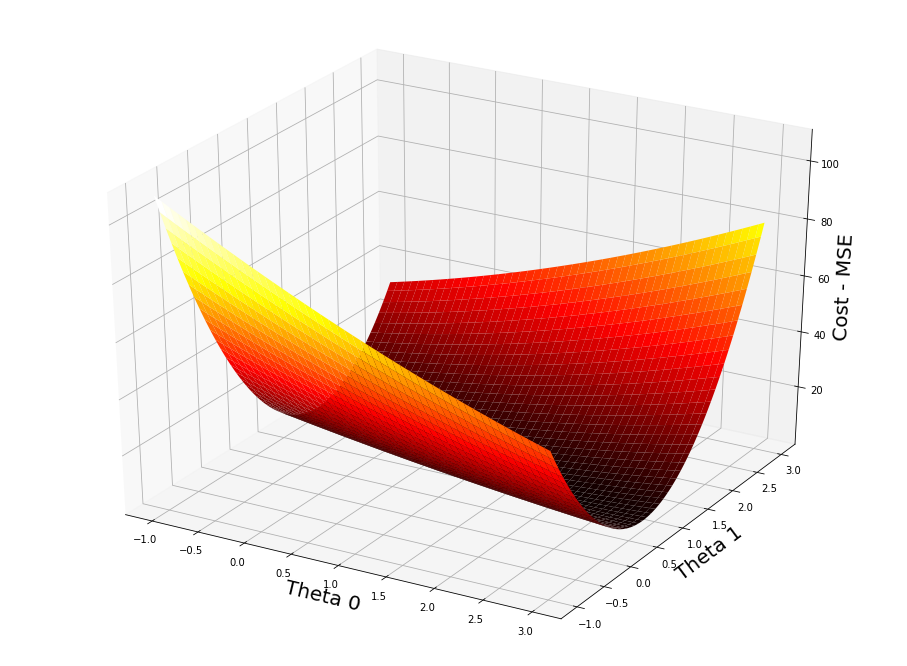

In [167]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [168]:
print('Min value of plot_cost:', plot_cost.min())

# theta1 and theta0 associated with this min cost
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j)', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost: 0.9483826526747164
Min occurs at (i, j) (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

In [169]:
# Partial derivatives depend on what kinda of equation we're using for y_hat (in this case LR with one variables)

## MSE & Gradient Descent

In [170]:
# x values, y values, array of theta parameters (theta_0 at index 0 & theta_1 at index 1)
def grad(x, y, thetas):
    n = y.size  # whole lis of y values
    
    # create two values = theta0_slope and theta1_slope to hold slope values from partial derivatives
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
#     3 ways to write to get the same o/p these values as array:
#     return np.array([theta_0[0], theta1_slope[0]])
#     return np.append(arr = theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [171]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
#     Append the new values to our numpy array
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0) # take existing array of plot_vals and concatenate with new theta arry which is reshaped into 1,2 
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
#     Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))  

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


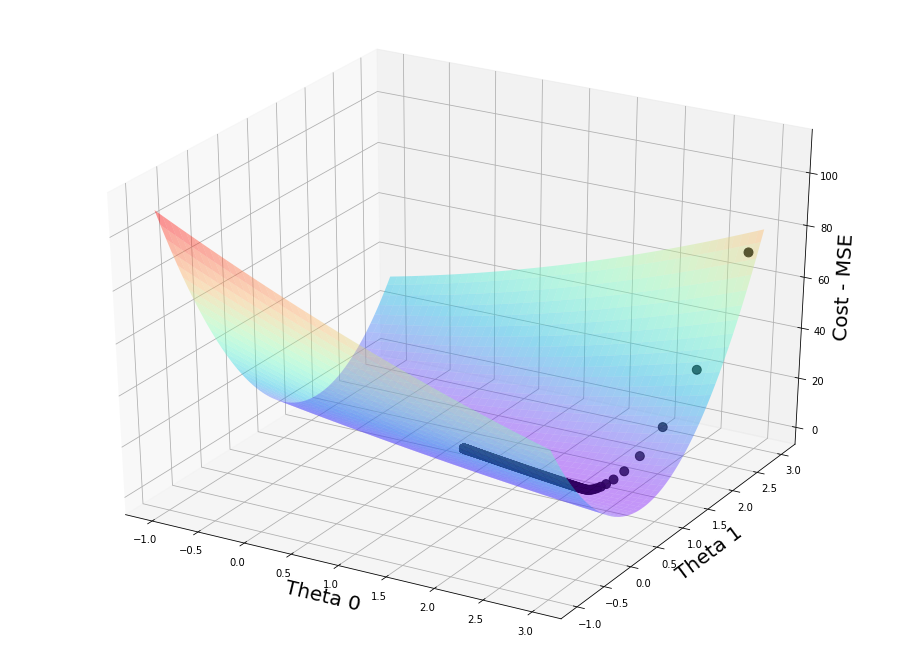

In [174]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()